In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import re
import random
from rhg import *
from shortest_path_finder import *
from figure_utility import *
from EXPERIMENT import exp

%load_ext autoreload
%autoreload 2

In [73]:
print(np.size(np.arange(0.01, 1, 0.01)))

99


# Test

In [24]:
n = 1000
path = f"./dk-lab-2020_code_hyperlink/netdata/rhg_test_n{n}.net"
G = rhg.load(path)

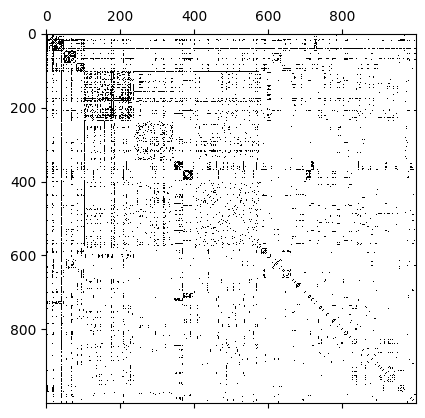

In [25]:
A = nx.adjacency_matrix(G)
plt.spy(A.toarray())

In [48]:
print(nx.radius(G))

2


In [47]:
spath = dict(nx.shortest_path(G))
for s_dict in nx.shortest_path(G):
    if len(spath[sd]) > 3:
        print(spath[sd])
# print(spath)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




{473: [473], 3: [473, 3], 4: [473, 4], 7: [473, 7], 8: [473, 8], 14: [473, 14], 26: [473, 26], 35: [473, 35], 36: [473, 36], 47: [473, 47], 56: [473, 56], 58: [473, 58], 59: [473, 59], 65: [473, 65], 70: [473, 70], 73: [473, 73], 76: [473, 76], 78: [473, 78], 82: [473, 82], 84: [473, 84], 86: [473, 86], 93: [473, 93], 101: [473, 101], 113: [473, 113], 114: [473, 114], 124: [473, 124], 126: [473, 126], 128: [473, 128], 131: [473, 131], 133: [473, 133], 146: [473, 146], 149: [473, 149], 151: [473, 151], 157: [473, 157], 162: [473, 162], 176: [473, 176], 177: [473, 177], 183: [473, 183], 184: [473, 184], 189: [473, 189], 192: [473, 192], 193: [473, 193], 201: [473, 201], 207: [473, 207], 231: [473, 231], 233: [473, 233], 235: [473, 235], 236: [473, 236], 241: [473, 241], 242: [473, 242], 243: [473, 243], 245: [473, 245], 248: [473, 248], 249: [473, 249], 253: [473, 253], 265: [473, 265], 267: [473, 267], 269: [473, 269], 272: [473, 272], 274: [473, 274], 279: [473, 279], 284: [473, 284],

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




{774: [774], 239: [774, 239], 331: [774, 331], 388: [774, 388], 443: [774, 443], 514: [774, 514], 545: [774, 545], 597: [774, 597], 611: [774, 611], 757: [774, 757], 765: [774, 765], 877: [774, 877], 931: [774, 931], 961: [774, 961], 974: [774, 974], 8: [774, 239, 8], 20: [774, 239, 20], 23: [774, 239, 23], 60: [774, 239, 60], 78: [774, 239, 78], 93: [774, 239, 93], 114: [774, 239, 114], 124: [774, 239, 124], 163: [774, 239, 163], 179: [774, 239, 179], 217: [774, 239, 217], 225: [774, 239, 225], 236: [774, 239, 236], 260: [774, 239, 260], 261: [774, 239, 261], 275: [774, 239, 275], 276: [774, 239, 276], 337: [774, 239, 337], 385: [774, 239, 385], 411: [774, 239, 411], 433: [774, 239, 433], 472: [774, 239, 472], 533: [774, 239, 533], 541: [774, 239, 541], 566: [774, 239, 566], 573: [774, 239, 573], 591: [774, 239, 591], 609: [774, 239, 609], 619: [774, 239, 619], 647: [774, 239, 647], 664: [774, 239, 664], 694: [774, 239, 694], 703: [774, 239, 703], 716: [774, 239, 716], 720: [774, 239

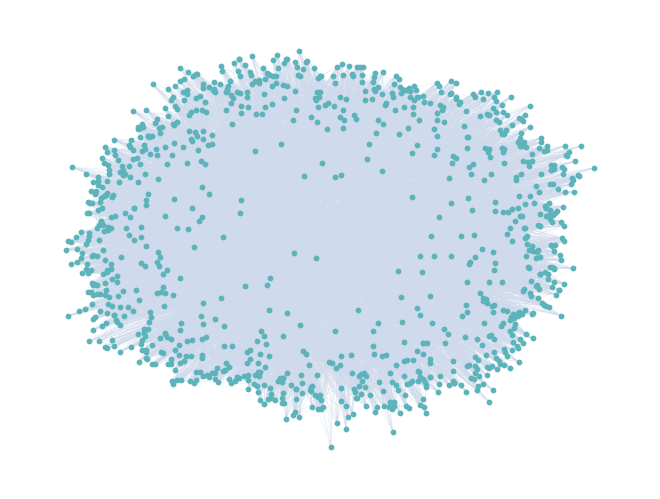

In [30]:
node_color = '#5CB3BA'
edge_color = '#CFDAEC'
pos = []
with open(f"./dk-lab-2020_code_hyperlink/output/rhg_test1.txt", 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip().split('\t')
        r = float(line[2])
        theta = float(line[3])
        x = r*np.cos(theta)
        y = r*np.sin(theta)
        pos.append((x, y))
nx.draw(G, pos=pos, node_size=10, node_color=node_color, edge_color=edge_color, width=0.2)

# Test RHG

In [79]:
n=500
alpha=3/4
print(rf'degree distribution parameter lambda={2*alpha+1}')  # 2~3
T=0.5  # T higher, less clustering coefficient
d = 5
mu = d*(2*alpha-1)**2*np.sin(np.pi*T)/(T*8*alpha**2)
R=2*np.log(n/mu)
print(f"to make d={d}, set R={R}")
hyperbolic_graph = rhg(n, R, T, alpha)
hyperbolic_graph_A = hyperbolic_graph.generate()
G = nx.from_numpy_array(hyperbolic_graph_A)
if nx.is_connected(G):
    print(nx.radius(G))
else:
    spath = dict(nx.shortest_path(G))
    path_distances = set()
    for s in spath:
        for des in spath[s]:
            path_distances.add(len(spath[s][des]))
    print(path_distances)

degree distribution parameter lambda=2.5
to make d=5, set R=13.604789526648622


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 285.08it/s]


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


In [91]:
for s in spath:
    for des in spath[s]:
        if len(spath[s][des]) == 10:
            print(f"src {s}, des {des}, path {spath[s][des]}")

src 31, des 179, path [31, 223, 360, 323, 455, 484, 317, 50, 222, 179]
src 179, des 31, path [179, 222, 50, 317, 484, 20, 417, 360, 223, 31]


In [80]:
path = f"./dk-lab-2020_code_hyperlink/netdata/rhg_test_n{n}_alpha{alpha}_T{T}_d{5}.net"
rhg.save(hyperbolic_graph_A, path)

In [82]:
largest_cc = max(nx.connected_components(G), key=len)
print(len(largest_cc))

461


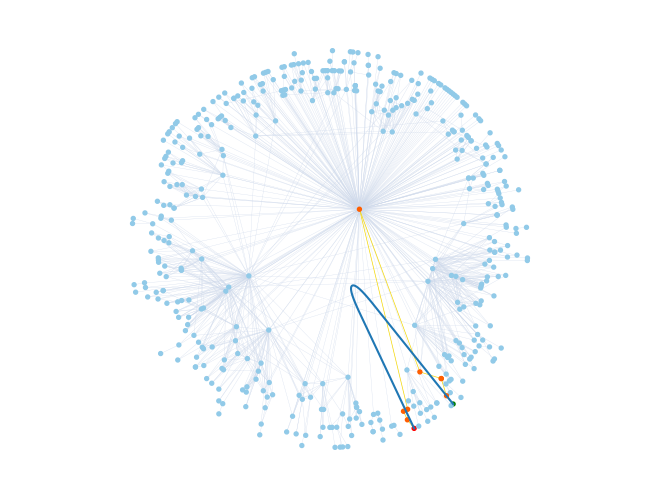

In [100]:
src_node = 31
des_node = 179
shortest_path = spath[src_node][des_node]
shortest_path_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
node_color = []
edge_color = []  # '#CFDAEC'
width = []
# get node pos by hyperbolic embedding
pos = dict()
src_rtheta = None
des_rtheta = None
with open(f"./dk-lab-2020_code_hyperlink/output/rhg_test_n{n}_alpha{alpha}_T{T}_d{5}.txt", 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip().split('\t')
        i = int(line[0])
        r = float(line[2])
        theta = float(line[3])
        x = r*np.cos(theta)
        y = r*np.sin(theta)
        pos[i] = (x, y)
        if i == src_node:
            src_rtheta = (r, theta)
        if i == des_node:
            des_rtheta = (r, theta)
# select max_component
max_component_subgraph = G.subgraph(largest_cc).copy()
# set node color
for node in max_component_subgraph.nodes:
    if node == src_node:
        node_color.append("red")
    elif node == des_node:
        node_color.append("green")
    elif node in shortest_path:
        node_color.append("#FF5E00")
    else:
        node_color.append("#91CAE8")
# set edge color and edge width
for edge in max_component_subgraph.edges:
    if edge in shortest_path_edges or (edge[1], edge[0]) in shortest_path_edges:
        edge_color.append("#F3D707")
        width.append(0.5)
    else:
        edge_color.append("#CFDAEC")
        width.append(0.2)
# print(max_component_subgraph.nodes)
nx.draw(max_component_subgraph, pos=pos, node_size=8, node_color=node_color, edge_color=edge_color, width=width)
plt.axis('equal')
# visualize geodesic
KL_src_rtheta = (np.tanh(src_rtheta[0]), src_rtheta[1])
KL_des_rtheta = (np.tanh(des_rtheta[0]), des_rtheta[1])
KL_src_xy = (KL_src_rtheta[0]*np.cos(KL_src_rtheta[1]), KL_src_rtheta[0]*np.sin(KL_src_rtheta[1]))
KL_des_xy = (KL_des_rtheta[0]*np.cos(KL_des_rtheta[1]), KL_des_rtheta[0]*np.sin(KL_des_rtheta[1]))
k = (KL_src_xy[1]-KL_des_xy[1])/(KL_src_xy[0]-KL_des_xy[0])
b = KL_des_xy[1] - k * KL_des_xy[0]
geodesic_x = []
geodesic_y = []
for t in np.arange(0, 1.01, 0.01):
    KL_x = (KL_des_xy[0] - KL_src_xy[0]) * t + KL_src_xy[0]
    KL_y = k * KL_x + b
    r = np.arctanh(np.sqrt(KL_x**2+KL_y**2))
    theta = np.arctan(KL_y/KL_x)
    geodesic_x.append(r*np.cos(theta))
    geodesic_y.append(r*np.sin(theta))
plt.plot(geodesic_x, geodesic_y)

In [62]:
n = 1000
p = 0.01
G = nx.erdos_renyi_graph(n, p)
print(nx.radius(G))

4


# Trial Test

## load network 1

In [3]:
net1_path = "./dk-lab-2020_code_hyperlink/netdata/h2v1.dat"
G1 = rhg.load(net1_path)
A1 = nx.adjacency_matrix(G1)
print(f"nodes {len(G1.nodes)}, edges {len(G1.edges)}")

nodes 19836, edges 103600


In [16]:
p = 0.2
perturbated_A1 = rhg.random_perturbation(A1, p)

In [17]:
perturbated_G1 = nx.from_scipy_sparse_array(perturbated_A1)
print(f"nodes {len(perturbated_G1.nodes)}, edges {len(perturbated_G1.edges)}")

nodes 19836, edges 83011


In [6]:
print(f"G1 is connected: {nx.is_connected(G1)}")
print(f"perturbated_G1 is connected: {nx.is_connected(perturbated_G1)}")

G1 is connected: False
perturbated_G1 is connected: False


In [4]:
largest_cc = max(nx.connected_components(G1), key=len)
print(len(largest_cc))

19651


In [11]:
print(type(largest_cc))

<class 'set'>


In [5]:
temp = random.sample(list(largest_cc), 2)
start, end = temp[0], temp[1]
print(f"start {start}, end {end}")
actual_shortest_path = nx.shortest_path(G1, source=start, target=end)
print(len(actual_shortest_path), actual_shortest_path)

start 12681, end 16010
4 [12681, 3859, 2907, 16010]


In [18]:
nx.shortest_path(perturbated_G1, source=start, target=end)

[8393, 8394, 109, 21, 13283]

In [21]:
ShortestPathFinder.precision(nx.shortest_path(perturbated_G1, source=start, target=end)[1:-1], actual_shortest_path[1:-1])

0.0

In [22]:
a = [23, 45]
b = [23, 34, 56, 45]
ShortestPathFinder.precision(a[1:-1], b[1:-1])

0.0

## visualize network 1

In [6]:
r_theta_coords = dict()
with open(f"./dk-lab-2020_code_hyperlink/coords_real/h2v1.coords.dat", 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip().split('\t')
        i = int(line[0])
        r = float(line[1])
        theta = float(line[2])
        r_theta_coords[i] = (r, theta)

(15.823484, 5.710437)
15.823061283953646 -0.5727483071795867


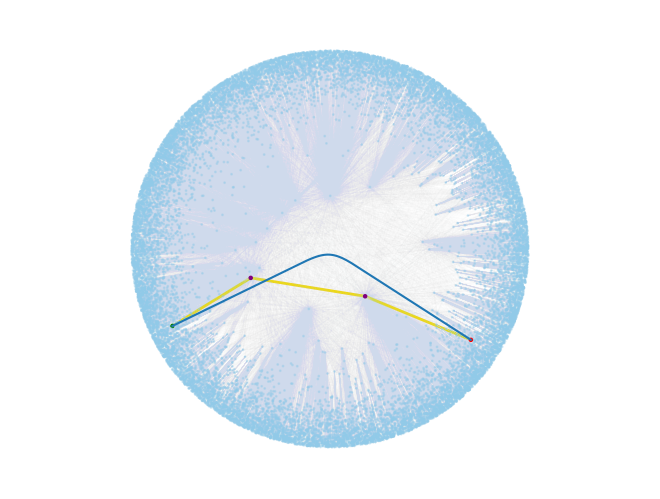

In [8]:
hyperbolic_graph_visulize(G1, r_theta_coords, shortest_path=actual_shortest_path, base_node_size=1, 
                          shortest_path_node_size=5, shortest_path_edge_size=2)
save_path = "./figure/visual_network1.pdf"
plt.savefig(save_path)

In [9]:
actual_shortest_paths = [path for path in nx.all_shortest_paths(G1, source=start, target=end)]
print(f"{start} {end} {actual_shortest_paths}")

12681 16010 [[12681, 3859, 2907, 16010], [12681, 3859, 12912, 16010], [12681, 3859, 16238, 16010]]


(15.823484, 5.710437)
15.823061283953646 -0.5727483071795867


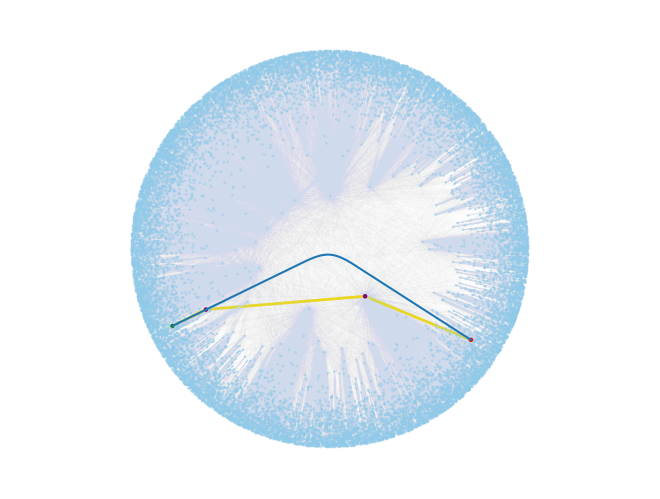

In [10]:
hyperbolic_graph_visulize(G1, r_theta_coords, shortest_path=actual_shortest_paths[2], base_node_size=1, 
                          shortest_path_node_size=5, shortest_path_edge_size=2)

In [52]:
start = 12391
end = 2609
length = len(actual_shortest_paths[0])
predicted_shortest_path = ShortestPathFinder(G1).hyperbolic_geodesic_distance(start, end, rtheta_coords=r_theta_coords, length=length)
print(predicted_shortest_path)

[12931, 2437, 6117, 2609]


In [2]:
def test_hyperbolic_geodesic_distance_approach(G, r_theta_coords):
    largest_cc = max(nx.connected_components(G), key=len)
    temp = random.sample(list(largest_cc), 2)
    start, end = temp[0], temp[1]
    print(f"start {start}, end {end}")
    actual_shortest_paths = [path for path in nx.all_shortest_paths(G, source=start, target=end)]
    print(f"all shortest paths: {actual_shortest_paths}")
    length = len(actual_shortest_paths[0])
    predicted_shortest_path = ShortestPathFinder(G).hyperbolic_geodesic_distance(start, end, rtheta_coords=r_theta_coords, length=length)
    print(f"predicted shortest path: {predicted_shortest_path}")
    return actual_shortest_paths, predicted_shortest_path

In [55]:
actual_shortest_paths, predicted_shortest_path = test_hyperbolic_geodesic_distance_approach(G1, r_theta_coords)

start 8051, end 9028
all shortest paths: [[8051, 1273, 9162, 9028], [8051, 2907, 9162, 9028], [8051, 15114, 9162, 9028], [8051, 1273, 11491, 9028], [8051, 2907, 11491, 9028], [8051, 15114, 11491, 9028], [8051, 1273, 12719, 9028], [8051, 2907, 12719, 9028], [8051, 15114, 12719, 9028], [8051, 1273, 14388, 9028], [8051, 2907, 14388, 9028], [8051, 15114, 14388, 9028]]
predicted shortest path: [8051, 11491, 12719, 9028]


(18.178041, 3.451614)
18.165667730784467 -2.831571307179586


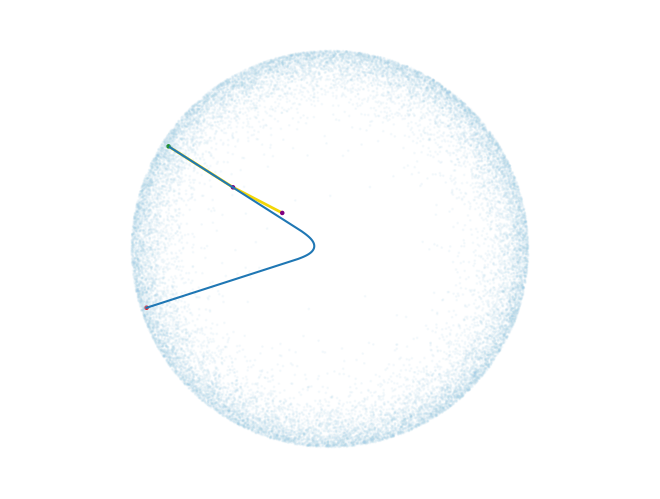

In [58]:
hyperbolic_graph_visulize(G1, r_theta_coords, shortest_path=predicted_shortest_path, 
                          base_node_size=1, shortest_path_node_size=5, shortest_path_edge_size=2, base_node_alpha="11", base_edge_alpha="01")

(18.178041, 3.451614)
18.165667730784467 -2.831571307179586


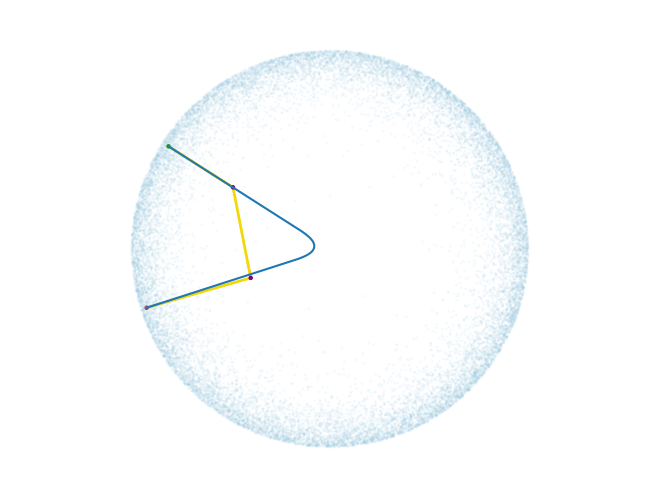

In [59]:
hyperbolic_graph_visulize(G1, r_theta_coords, shortest_path=[8051, 2907, 12719, 9028], 
                          base_node_size=1, shortest_path_node_size=5, shortest_path_edge_size=2, base_node_alpha="11", base_edge_alpha="01")

(18.178041, 3.451614)
18.165667730784467 -2.831571307179586


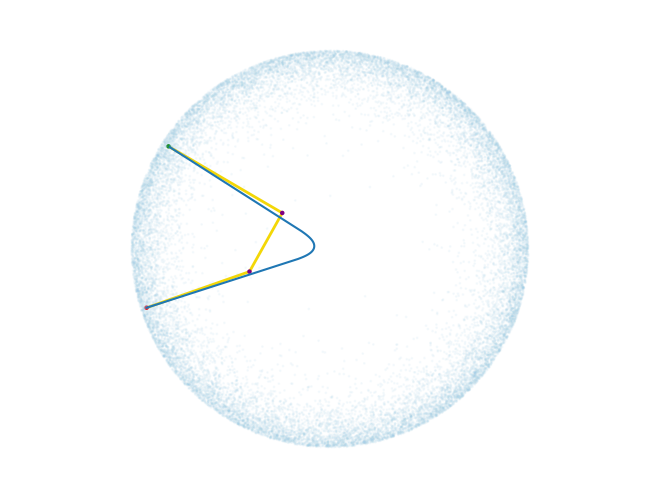

In [60]:
hyperbolic_graph_visulize(G1, r_theta_coords, shortest_path=[8051, 1273, 11491, 9028], 
                          base_node_size=1, shortest_path_node_size=5, shortest_path_edge_size=2, base_node_alpha="11", base_edge_alpha="01")

## generate smaller network with rhg

In [61]:
n=500
alpha=3/4
print(rf'degree distribution parameter lambda={2*alpha+1}')  # 2~3
T=0.5  # T higher, less clustering coefficient
d = 5
mu = d*(2*alpha-1)**2*np.sin(np.pi*T)/(T*8*alpha**2)
R=2*np.log(n/mu)
print(f"to make d={d}, set R={R}")
hyperbolic_graph = rhg(n, R, T, alpha)
hyperbolic_graph_A, rs, thetas = hyperbolic_graph.generate()
G = nx.from_numpy_array(hyperbolic_graph_A)
if nx.is_connected(G):
    print(nx.radius(G))
else:
    spath = dict(nx.shortest_path(G))
    path_distances = set()
    for s in spath:
        for des in spath[s]:
            path_distances.add(len(spath[s][des]))
    print(path_distances)

degree distribution parameter lambda=2.5
to make d=5, set R=13.604789526648622


100%|██████████| 500/500 [00:02<00:00, 194.96it/s]


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}


In [62]:
network_path = f"./dk-lab-2020_code_hyperlink/netdata/rhg_testA1_n{n}_alpha{alpha}_T{T}_d{d}.net"
rhg.save(hyperbolic_graph_A, network_path)
coords_path = f"./dk-lab-2020_code_hyperlink/coords_real/rhg_testA1_n{n}_alpha{alpha}_T{T}_d{d}.coords.dat"
rhg.save_coords(rs, thetas, coords_path)

In [63]:
r_theta_coords = dict()
for i in range(len(rs)):
    r_theta_coords[i] = (rs[i], thetas[i])

In [64]:
actual_shortest_paths, predicted_shortest_path = test_hyperbolic_geodesic_distance_approach(G, r_theta_coords)

start 328, end 351
all shortest paths: [[328, 143, 34, 138, 351], [328, 322, 34, 138, 351]]
predicted shortest path: [328, 143, 34, 138, 351]


(10.704272383491078, 4.436134212335036)
10.704272256712848 -1.8470510948445507


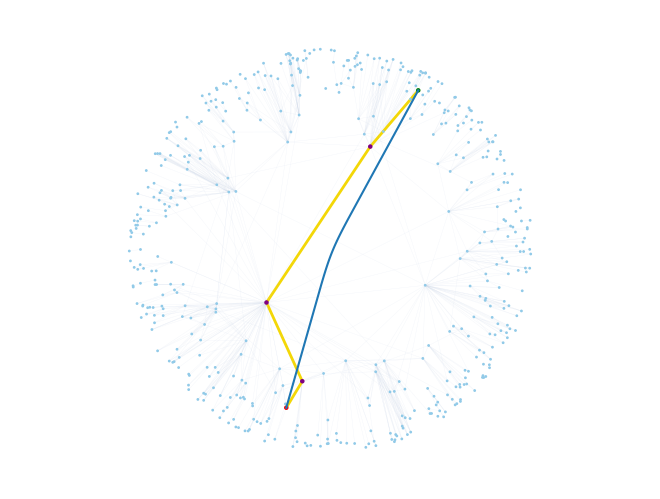

In [68]:
hyperbolic_graph_visulize(G, r_theta_coords, shortest_path=predicted_shortest_path, 
                          base_node_size=1, shortest_path_node_size=5, shortest_path_edge_size=2, base_node_alpha="FF", base_edge_alpha="55")

# test perturbated network 

In [75]:
myexp = exp()
net_path = "./dk-lab-2020_code_hyperlink/netdata/rhg_testA1_n500_alpha0.75_T0.5_d5.net"
myexp.load_network(net_path=net_path)

Network has nodes 458, edges 1042
Largest component size 430


In [76]:
temp = random.sample(list(myexp.max_component_subgraph.nodes), 2)
start, end = temp[0], temp[1]
actual_shortest_paths = [path for path in nx.all_shortest_paths(G, source=start, target=end)]
print(f"random select {len(actual_shortest_paths)} shortest path, between {start} and {end}, with length {len(actual_shortest_paths[0])}")

random select 1 shortest path, between 330 and 243, with length 3


In [86]:
p = 0.5
edges = myexp.max_component_subgraph.edges
perturbated_edges = rhg.random_perturbation_byedges(edges, p)
perturbated_G1 = nx.from_edgelist(perturbated_edges)
gcc = max(nx.connected_components(perturbated_G1), key=len)
print(f"GCC size {len(gcc)}, Start In GCC: {start in gcc}, End in GCC: {end in gcc}")

GCC size 293, Start In GCC: True, End in GCC: True


In [93]:
print(f"perturbate Graph size {len(perturbated_G1.nodes)}")

perturbate Graph size 340


In [91]:
length = len(actual_shortest_paths[0])
nodes = perturbated_G1.nodes
output_path = f"./dk-lab-2020_code_hyperlink/output/_debug_testA1.txt"
perturbate_network_path = f"./dk-lab-2020_code_hyperlink/netdata/_debug_perturbate_{p}_testA1.net"
rhg.save_byedges(perturbated_edges, perturbate_network_path)
# only embedding the gcc
rtheta_coords = rhg.hyperlink_embedding(perturbate_network_path, gamma=2.5, T=0.5, ouput_path=output_path, p=p)  

command: ./dk-lab-2020_code_hyperlink/hyperlink.exe ./dk-lab-2020_code_hyperlink/netdata/_debug_perturbate_0.5_testA1.net 2.5 0.5 1 ./dk-lab-2020_code_hyperlink/output/_debug_testA1.txt 0.5 20 1
Initialization ...
Here is the filename: _debug_perturbate_0.5_testA1.net
grab network from file ./dk-lab-2020_code_hyperlink/netdata/_debug_perturbate_0.5_testA1.net
grab
N = 500
gamma = 2.5
avg_kp = 3
T = 0.5
idum = 1
q = 0.5
num avg = 20
grid size multiplier coefficient = 1
A. Extract GCC of the network
Saving temporary largest connected component to: ./1751013280__debug_perturbate_0.5_testA1.net_tmp_gcc.net
save temp 
 ctr = 293
grab network from file ./1751013280__debug_perturbate_0.5_testA1.net_tmp_gcc.net
grab
num_nodes
grab network from file ./1751013280__debug_perturbate_0.5_testA1.net_tmp_gcc.net
grab
B. Infer all model parameters except gamma, T and q
N observable = 293
E = 445
max k  = 34
<k>_obs = 3.03754
<kp> = 3
<k> = 6.92026e-310
inferred N = 363.704
inferred kp_max = 34.5962
in

In [94]:
gcc_perturbated_G1 = perturbated_G1.subgraph(gcc).copy()
predicted_shortest_path = ShortestPathFinder(gcc_perturbated_G1).hyperbolic_geodesic_distance(start, end, rtheta_coords=rtheta_coords, length=length)
print(f"{start} {end} {actual_shortest_paths} {predicted_shortest_path}")

330 243 [[330, 419, 243]] [330, 419, 243]


In [97]:
predicted_shortest_path = ShortestPathFinder(gcc_perturbated_G1).dijkstra_weighted_rhg_p(start, end, rtheta_coords=rtheta_coords, R=13.604, T=0.5)

In [98]:
print(f"{start} {end} {actual_shortest_paths} {predicted_shortest_path}")

330 243 [[330, 419, 243]] [330, 419, 34, 243]


In [103]:
gcc_perturbated_G1 = perturbated_G1.subgraph(gcc).copy()

In [106]:
gcc_perturbated_G1.has_edge(330, 419)

True

# load network 2 

In [107]:
net1_path = "./dk-lab-2020_code_hyperlink/netdata/h2v2.dat"
G2 = rhg.load(net1_path)
A2 = nx.adjacency_matrix(G2)
print(f"nodes {len(G2.nodes)}, edges {len(G2.edges)}")
gcc2 = max(nx.connected_components(G2), key=len)
print(f"Network 2 GCC size: {len(gcc2)}")

nodes 19839, edges 108508
Network 2 GCC size: 19649


In [ ]:
r_theta_coords = dict()
with open(f"./dk-lab-2020_code_hyperlink/output/h2v2.coords.dat", 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip().split('\t')
        i = int(line[0])
        r = float(line[1])
        theta = float(line[2])
        r_theta_coords[i] = (r, theta)